<img src="..\Salifort_Images\Leonardo_Logo_2.jpg" alt="Logo" style="float:left; height:150px; margin-right:30px;">

# **Predicting Employee Attrition at Salifort Motors**
## **Model Development**

# **Introduction**

This Jupyter Notebook focuses on the feature selection and model development phase of the employee turnover prediction project for Salifort Motors. With insights from the exploratory data analysis (EDA) phase, we now refine our dataset by selecting the most relevant features to build an effective predictive model. The goal is to ensure that our model is both interpretable and accurate, helping HR identify key attrition drivers and implement targeted retention strategies.

**Objectives of This Notebook:**

* **Feature Selection** – Identify and retain the most predictive variables while addressing multicollinearity and redundant features using techniques such as Variance Inflation Factor (VIF), recursive feature elimination (RFE), and Lasso regression.
* **Statistical Model Development** – Implement a logistic regression model to assess feature significance, interpret coefficients, and establish baseline predictive performance.
* **Machine Learning Model Implementation** – Build decision tree, random forest, and XGBoost models to improve prediction accuracy and uncover nonlinear relationships in the data.
* **Model Evaluation & Champion Model Selection** – Assess model performance using accuracy, precision, recall, F1-score, and AUC-ROC, then determine the best-performing model for deployment based on predictive power, interpretability, and business alignment.

By the end of this notebook, we will have a refined feature set and a set of trained models that provide actionable insights for HR and leadership to proactively address attrition risks.

<br>

## **Business Scenario & Problem**

Salifort Motors is experiencing high employee turnover, leading to increased recruitment costs, operational disruptions, and productivity loss. The HR department has collected survey data from employees and wants to understand why employees leave and how to improve retention.

To address this, Salifort’s leadership has tasked me, their data analytics professional, with uncovering key drivers of turnover. My role is to analyze the survey dataset and develop a predictive model that forecasts which employees are most likely to leave.

By accurately identifying risk factors HR can implement targeted retention strategies to enhance employee satisfaction and reduce hiring and training costs.

<br>

## **Data Dictionary**

This [Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) is a cleaned and feature-engineered version of the one available in the linked source and includes:

* **11,991 rows** - each row is a different employee's self-reported information
* **18 columns**

**Features and Descriptions**

| **Variable**               | **Description** |
|---------------------------|----------------|
| `satisfaction_level`      | Employee-reported job satisfaction level *(float, 0–1)*. |
| `last_evaluation`        | Score of employee's last performance review *(float, 0–1)*. |
| `number_project`         | Number of projects the employee contributes to *(integer)*. |
| `average_monthly_hours`  | Average number of hours the employee worked per month *(integer)*. |
| `company_tenure`        | How long the employee has been with the company in years *(integer)* *(Renamed from `time_spend_company`)*. |
| `work_accident`         | Whether the employee experienced a work accident *(binary: 0 = No, 1 = Yes)*. |
| `left`                 | Whether the employee left the company *(binary: 0 = Stayed, 1 = Left)*. |
| `promotion_last_5years` | Whether the employee was promoted in the last 5 years *(binary: 0 = No, 1 = Yes)*. |
| `salary`               | The employee's salary level *(categorical: low(0), medium(1), high(2))*. |
| `department_RandD`     | Whether the employee belongs to the R&D department *(binary: 0 = No, 1 = Yes)*. |
| `department_accounting` | Whether the employee belongs to the Accounting department *(binary: 0 = No, 1 = Yes)*. |
| `department_hr`        | Whether the employee belongs to the HR department *(binary: 0 = No, 1 = Yes)*. |
| `department_management` | Whether the employee belongs to the Management department *(binary: 0 = No, 1 = Yes)*. |
| `department_marketing`  | Whether the employee belongs to the Marketing department *(binary: 0 = No, 1 = Yes)*. |
| `department_product_mng` | Whether the employee belongs to the Product Management department *(binary: 0 = No, 1 = Yes)*. |
| `department_sales`      | Whether the employee belongs to the Sales department *(binary: 0 = No, 1 = Yes)*. |
| `department_support`    | Whether the employee belongs to the Support department *(binary: 0 = No, 1 = Yes)*. |
| `department_technical`  | Whether the employee belongs to the Technical department *(binary: 0 = No, 1 = Yes)*. |

<br>

## **Choosing the Right Scoring Metric for Employee Attrition Prediction**

Since our business objective is to predict employee attrition and help HR implement proactive retention strategies, the most critical metric depends on which error type is costlier:

* False Negatives (FN) → Misclassifying employees who are likely to leave as staying (missed attrition risk).
* False Positives (FP) → Predicting employees will leave when they actually stay (unnecessary retention efforts).

For HR and business decision-making, False Negatives (FN) are typically more costly, because missing at-risk employees means:  

✅ Higher unexpected turnover  
✅ Increased hiring & training costs  
✅ Reduced workforce stability & productivity

**Final Recommendation for This Project:**

* Primary Focus: Recall for the Attrition Class (1) → Ensures we identify employees at risk of leaving.
* Secondary Focus: AUC-ROC Score → Measures overall classification quality.
* Tertiary Focus: F1-Score → Helps balance recall vs. precision if necessary.

<br>

## **Contents**  

#### **Setup and Data Initialization**  
1️⃣ Import Libraries and Packages  
2️⃣ Import Dataset  
3️⃣ Data Validation  

#### **Model Development**  
4️⃣ Model Assessment & Preparation  
5️⃣ Logistic Regression  
6️⃣ Build and Train Tree-based Models: Round 1  
7️⃣ Assess Models and Features  
8️⃣ Build and Train Tree-based Models: Round 2    

#### **Model Evaluation**
9️⃣ Performance Metrics & Comparison  
🔟 Confusion Matrix & ROC Curve Analysis  
1️⃣1️⃣ Use Champion Model on Test Data  
1️⃣2️⃣ Visualizing Champion Model Feature Importance  

#### **Final Thoughts** 
1️⃣3️⃣ Final Conclusion: Employee Attrition Analysis & Model Selection

<br>

# **Setup and Initionalization**
## **1️⃣ Import Libraries and Packages**

**Import** necessary libraries for data manipulation, visualization, and modelling.

In [1]:
# Import packages for data manipulation, visualization, and model building
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer
from sklearn.tree import plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor

<br>

## **2️⃣ Import Dataset**

**Load** both the cleaned and encoded dataset into a DataFrame for exploration and analysis.

In [2]:
# Read in encoded dataset
df_enc = pd.read_csv(r'C:\Users\danet\Documents\HR_capstone_dataset_modelling.csv')

<br>

## **3️⃣ Data Validation**

**Inspect** first five rows

In [3]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


<br>

**View** basic information about the data

In [4]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   company_tenure          11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_RandD        11991 non-null  int64  
 10  department_accounting   11991 non-null  int64  
 11  department_hr           11991 non-null  int64  
 12  department_management   11991 non-null  int64  
 13  department_marketing    11991 non-null  int64  
 14  department_product_mng  11991 non-null

<br>

**Generate** descriptive statistics

In [5]:
df_enc.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<br>

# **Model Development**  

## **4️⃣ Model Assessment & Preparation**

#### **⚙️ Assessing Class Balance**

In [6]:
# Check class balance
values = df_enc['left'].value_counts(dropna=False)
distribution = (values / values.sum() * 100).round(2)
balance_df = pd.DataFrame({
    'Count' : values,
    'Distribution' : distribution.round(2).astype(str) + '%'
})
balance_df

,Count,Distribution
left,,
0,10000,83.4%
1,1991,16.6%


#### ***📝 Note: Class Imbalance***

Employee attrition is naturally imbalanced in the real world, with significantly fewer employees leaving compared to those who stay. While techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling could be used to balance the dataset, doing so might distort the true distribution of attrition rates and lead to unrealistic predictions.

Instead, we will retain the original class distribution and address the imbalance by using class weighting (class_weight='balanced') in our logistic regression model. This approach ensures that the model correctly accounts for the imbalance without artificially altering the dataset.

<br>

#### **⚙️ Examining Correlations**

📊 **Correlation Matrix & Heatmap**  

In [7]:
# Correlation matrix to help determine most correlated variables
corr_matrix = df_enc.corr(numeric_only = True)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.029241,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.015775,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.000502,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000551,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321
company_tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.038164,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.000058,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.118882,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.087851,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502
salary,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,1.000000,-0.000048,0.007692,-0.011977,0.113304,0.010596,-0.010873,-0.009728,-0.007180,-0.027938
department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.000048,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925


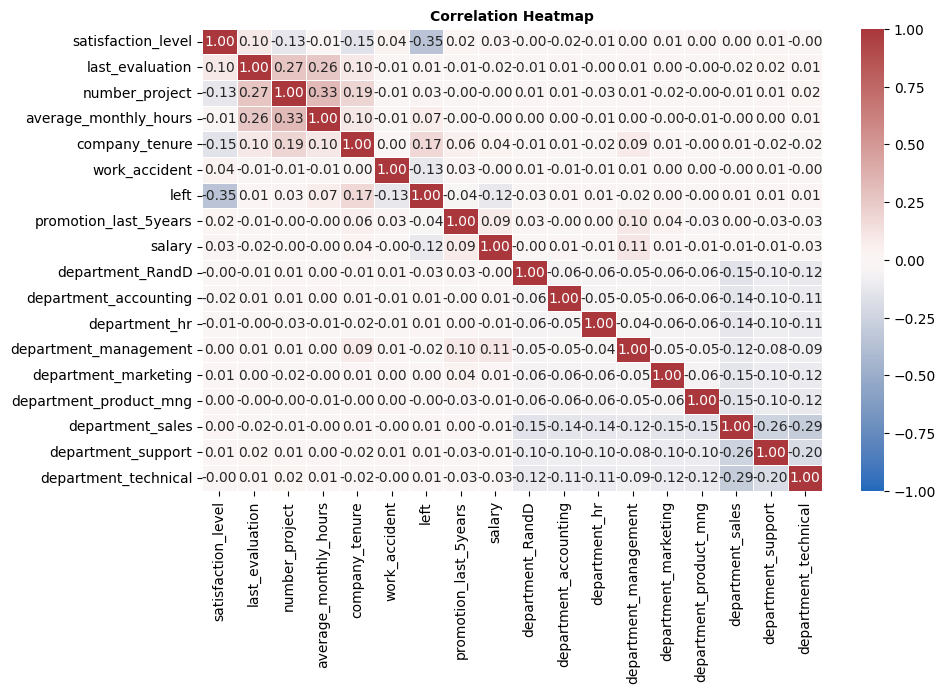

In [8]:
# 📌 Correlation Heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=10, fontweight="bold")
plt.show()

#### **📝 Note: Correlation Analysis Summary**

After assessing the correlation heatmap, no features exhibit severe multicollinearity (±0.8 or higher), confirming that all variables can be retained for modeling.  

**Key Observations:**  
- **`'satisfaction_level'` vs. `'left'` (-0.35)**  
  - A moderate negative correlation suggests that lower satisfaction is associated with higher attrition.  
  - This is an important predictor for the model.  

- **`'number_project'` vs. `'average_monthly_hours'` (0.33)**  
  - Employees working on more projects tend to work longer hours, which aligns with expectations.  
  - This relationship does not indicate redundancy, so both variables remain useful.  

- **`'department_sales'` vs. `'department_technical'` (-0.29)**  
  - This negative correlation is a result of one-hot encoding—an employee cannot belong to both departments.  
  - No action needed since this does not impact modeling.  

**Next Steps:**  
Since no high multicollinearity is detected, we can proceed with training the logistic regression model without feature modifications.

<br>

📊 **Calculate Variance Inflation Factor (VIF) Scores**  

In [9]:
# Select only numerical columns
numerical_cols = df_enc.select_dtypes(include=['number'])

# Add a constant column for VIF calculation
X = numerical_cols.copy()
X.insert(0, 'Intercept', 1)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the Intercept row for clarity
vif_data = vif_data[vif_data["Feature"] != "Intercept"]

# Display VIF scores
from IPython.display import display
display(vif_data)

,Feature,VIF
1,satisfaction_level,1.198235
2,last_evaluation,1.147357
3,number_project,1.231666
4,average_monthly_hours,1.174644
5,company_tenure,1.097372
6,work_accident,1.017985
7,left,1.208803
8,promotion_last_5years,1.026192
9,salary,1.036213
10,department_RandD,1.615844


#### **📝 Note: Multicollinearity Analysis**

All VIF values are below 5, indicating no significant multicollinearity concerns. No variables need to be removed or transformed, so we can proceed with training the logistic regression model confidently. 

<br>

#### **⚙️ Assess Outliers**

In [10]:
# Using a loop to identify outliers and determine the proportion
column_list = ['satisfaction_level',
              'last_evaluation',
              'number_project',
              'average_monthly_hours',
              'company_tenure'
              ]

results = []

# Define function (EDA established outliers > than upper limit and not below lower limit)
def calculate_outliers(df_enc, column_list):
    results = []

    for column in column_list:
        q1 = df_enc[column].quantile(0.25)
        q3 = df_enc[column].quantile(0.75)
        iqr = q3 - q1

        # Calculate thresholds
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr
        
        # Count outliers above and below thresholds
        upper_outliers = (df_enc[column] > upper_threshold).sum()
        lower_outliers = (df_enc[column] < lower_threshold).sum()

        # Total outliers and proportion
        total_outliers = upper_outliers + lower_outliers
        proportion = (total_outliers / len(df_enc)) * 100

        results.append([
            column,
            upper_outliers,
            lower_outliers,
            total_outliers,
            f"{proportion:.2f}%"
        ])

    # Create a DataFrame to display the results
    outlier_df = pd.DataFrame(results, columns=[
        'Column',
        'Upper Outliers',
        'Lower Outliers',
        'Total Outliers',
        'Proportion'
    ])

    return outlier_df

# Call the function and assign the result to `outlier_df`
outlier_df = calculate_outliers(df_enc, column_list)
outlier_df

,Column,Upper Outliers,Lower Outliers,Total Outliers,Proportion
0,satisfaction_level,0,0,0,0.00%
1,last_evaluation,0,0,0,0.00%
2,number_project,0,0,0,0.00%
3,average_monthly_hours,0,0,0,0.00%
4,company_tenure,824,0,824,6.87%


<br>

**Visualize** outliers in `'company_tenure'` column

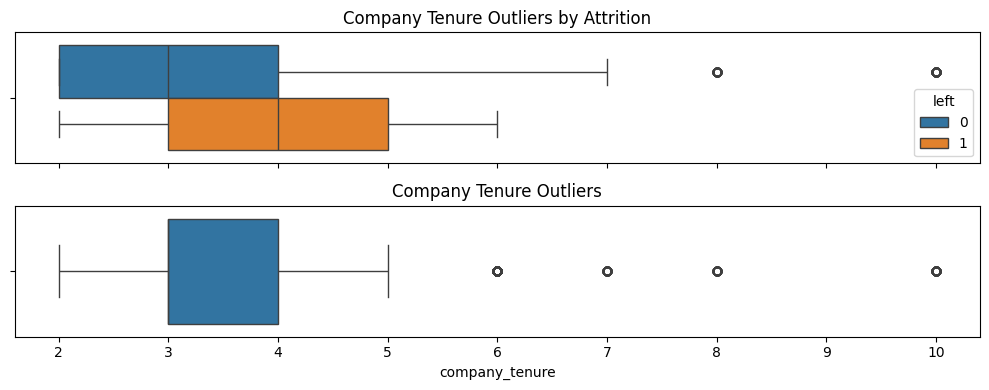

In [11]:
# Set figure size and layout for subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# 📌 Subplot 1: Boxplot - Company Tenure Outliers by Attrition
sns.boxplot(data=df_enc, x="company_tenure", hue="left", ax=axes[0])
axes[0].set_title("Company Tenure Outliers by Attrition")

# 📌 Subplot 2: Boxplot - Company Tenure Outliers (Without Hue)
sns.boxplot(data=df_enc, x="company_tenure", ax=axes[1])
axes[1].set_title("Company Tenure Outliers")

# Adjust layout for better readability
plt.tight_layout()

# Show plots
plt.show()

#### ***📝 Note: Assessing Outliers in `'company_tenure'`***

**824 outliers (6.87% of the entire dataset)** are observed from those within the `'company_tenure'` column. Since these outliers represent long-tenured employees who are committed to the company, it's important to assess their influence on the model before deciding whether to drop, transform, or keep them.

**To determine the best approach, I will train and evaluate two logistic regression models:**
* Model A: Includes all data (outliers present).
* Model B: Removes rows with `'company_tenure'` outliers.

**Next Steps:** Compare model performance using AUC-ROC, precision, recall, and F1-score to determine whether the outliers negatively impact prediction accuracy.

<br>

#### **⚙️ Define a Scoring Function**  
**Goal**: to retrieve all scores from a model's predictions, simplifying comparison.

In [12]:
def get_model_scores(model_name, y_true, y_pred, y_pred_proba):
    """
    Computes key evaluation metrics for a classification model.
    
    Parameters:
    - model_name (str): Name of the model
    - y_true (array): Actual target values
    - y_pred (array): Model predictions (binary)
    - y_pred_proba (array): Model predicted probabilities for the positive class
    
    Returns:
    - dict: Dictionary of model performance metrics
    """
    scores = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=1),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred_proba)
    }
    
    return scores

<br>

## **5️⃣ Logistic Regression**

First, I will focus on logistic regression separately from the tree based models.

#### **🔧 Variable Selection & Train-Test Split**

In [13]:
# Extract specific thresholds for 'company_tenure'
Q1 = df_enc['company_tenure'].quantile(0.25)
Q3 = df_enc['company_tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [14]:
# Create two datasets: Model A (all data) & Model B (excluding outliers)
df_model_a = df_enc.copy()  # Model A: Includes all data
df_model_b = df_enc[(df_enc['company_tenure'] >= lower_threshold) & (df_enc['company_tenure'] <= upper_threshold)]  # Model B: Removes tenure outliers

In [15]:
# Define features and target variable
X_a = df_model_a.drop(columns=['left'])  # Model A features
y_a = df_model_a['left']  # Model A target

X_b = df_model_b.drop(columns=['left'])  # Model B features
y_b = df_model_b['left']  # Model B target

In [16]:
# Perform train-test split (SAME RANDOM STATE for consistency)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.25, stratify=y_a, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.25, stratify=y_b, random_state=42)

# Confirm split sizes
print("Model A - Train size:", X_train_a.shape, "Test size:", X_test_a.shape)
print("Model B - Train size:", X_train_b.shape, "Test size:", X_test_b.shape)

Model A - Train size: (8993, 17) Test size: (2998, 17)
Model B - Train size: (8375, 17) Test size: (2792, 17)


<br>

#### **🔧Training the Logistic Regression Models (Model A & Model B)**

Now, I'll train two logistic regression models:  
* Model A (Includes all data, outliers present)
* Model B (Excludes `'company_tenure'` outliers)

I'll also apply `class_weight='balanced'` to handle class imbalance.

In [17]:
# Initialize logistic regression models
model_a = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model_b = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train Model A (All data, outliers present)
model_a.fit(X_train_a, y_train_a)

# Train Model B (Outliers removed)
model_b.fit(X_train_b, y_train_b)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

<br>

#### **🔧 Model Predictions & Evaluation**

In [18]:
# Make predictions for Model A
y_pred_a = model_a.predict(X_test_a)
y_pred_proba_a = model_a.predict_proba(X_test_a)[:, 1]  # Probabilities for AUC-ROC

# Make predictions for Model B
y_pred_b = model_b.predict(X_test_b)
y_pred_proba_b = model_b.predict_proba(X_test_b)[:, 1]  # Probabilities for AUC-ROC

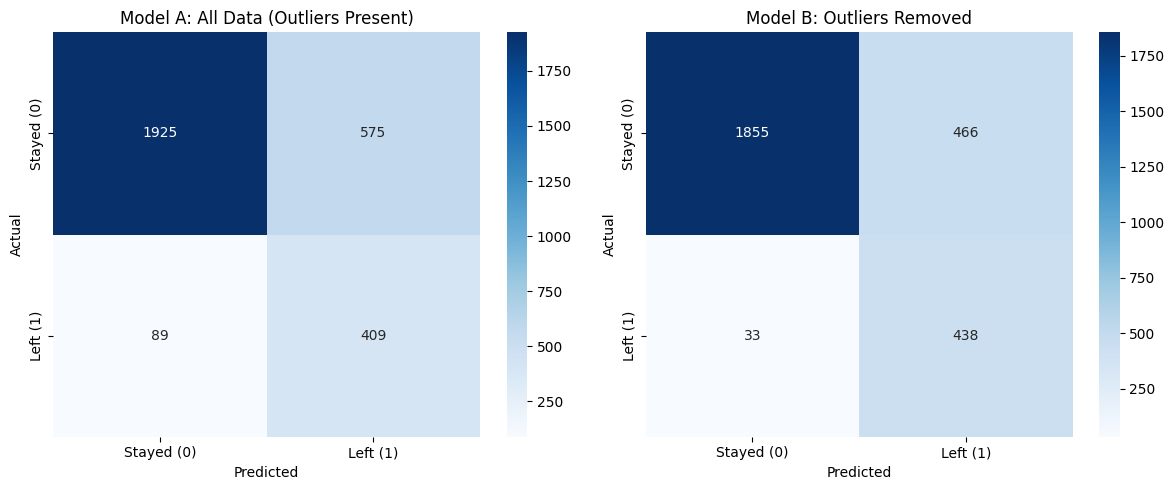

In [19]:
# Generate confusion matrices
cm_a = confusion_matrix(y_test_a, y_pred_a)
cm_b = confusion_matrix(y_test_b, y_pred_b)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 📌 Confusion Matrix: Model A
sns.heatmap(cm_a, annot=True, fmt='d', cmap="Blues", xticklabels=["Stayed (0)", "Left (1)"], 
            yticklabels=["Stayed (0)", "Left (1)"], ax=axes[0])
axes[0].set_title("Model A: All Data (Outliers Present)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# 📌Confusion Matrix: Model B
sns.heatmap(cm_b, annot=True, fmt='d', cmap="Blues", xticklabels=["Stayed (0)", "Left (1)"], 
            yticklabels=["Stayed (0)", "Left (1)"], ax=axes[1])
axes[1].set_title("Model B: Outliers Removed")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Evaluate Model A
print("🔹 Model A: Logistic Regression (All Data, Outliers Present)")
print(classification_report(y_test_a, y_pred_a))
print(f"AUC-ROC Score: {roc_auc_score(y_test_a, y_pred_proba_a):.4f}")

print("\n" + "="*60 + "\n")

# Evaluate Model B
print("🔹 Model B: Logistic Regression (Outliers Removed)")
print(classification_report(y_test_b, y_pred_b))
print(f"AUC-ROC Score: {roc_auc_score(y_test_b, y_pred_proba_b):.4f}")

🔹 Model A: Logistic Regression (All Data, Outliers Present)
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2500
           1       0.42      0.82      0.55       498

    accuracy                           0.78      2998
   macro avg       0.69      0.80      0.70      2998
weighted avg       0.87      0.78      0.80      2998

AUC-ROC Score: 0.8431


🔹 Model B: Logistic Regression (Outliers Removed)
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2321
           1       0.48      0.93      0.64       471

    accuracy                           0.82      2792
   macro avg       0.73      0.86      0.76      2792
weighted avg       0.90      0.82      0.84      2792

AUC-ROC Score: 0.8820


#### 🔍 ***Key Insights Summary:***

Removing outliers led to a notable improvement in model performance, increasing overall accuracy (78% → 82%) and recall for attrition prediction (82% → 93%), meaning the refined model is more effective in identifying employees at risk of leaving. Additionally, precision for staying employees improved (96% → 98%), reducing false positives. The AUC-ROC score (0.88) further confirms that the model's ability to differentiate between stayers and leavers has significantly strengthened post outlier removal.

<br>

#### **🔧 Interpreting Coefficients & Odds Ratios (Model B)**

Now, I will analyze the logistic regression coefficients to understand: 

✅ Feature importance – Which variables have the most impact on attrition?  
✅ Direction of influence – Do they increase or decrease the likelihood of an employee leaving?  
✅ Odds Ratios – How much a 1-unit increase in a feature affects attrition probability.

How to Interpret the Results:
* Positive Coefficients & Odds Ratio > 1 → Increase the likelihood of attrition
* Negative Coefficients & Odds Ratio < 1 → Decrease the likelihood of attrition
* Closer to 1 → Minimal impact on attrition

In [21]:
# Extract coefficients from Model B
coefs = model_b.coef_[0]  # Logistic regression returns coefficients as an array

# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X_train_b.columns, 'Coefficient': coefs})

# Calculate odds ratios (exp(coef))
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Sort by absolute impact
coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)

# Display the results
display(coef_df)

,Feature,Coefficient,Odds Ratio
4,company_tenure,1.717900,5.572813
14,department_sales,0.150979,1.162972
10,department_hr,0.128875,1.137548
15,department_support,0.095410,1.100110
16,department_technical,0.087010,1.090907
1,last_evaluation,0.042722,1.043648
13,department_product_mng,0.028911,1.029333
3,average_monthly_hours,0.002630,1.002634
11,department_management,-0.026184,0.974155
12,department_marketing,-0.042849,0.958056


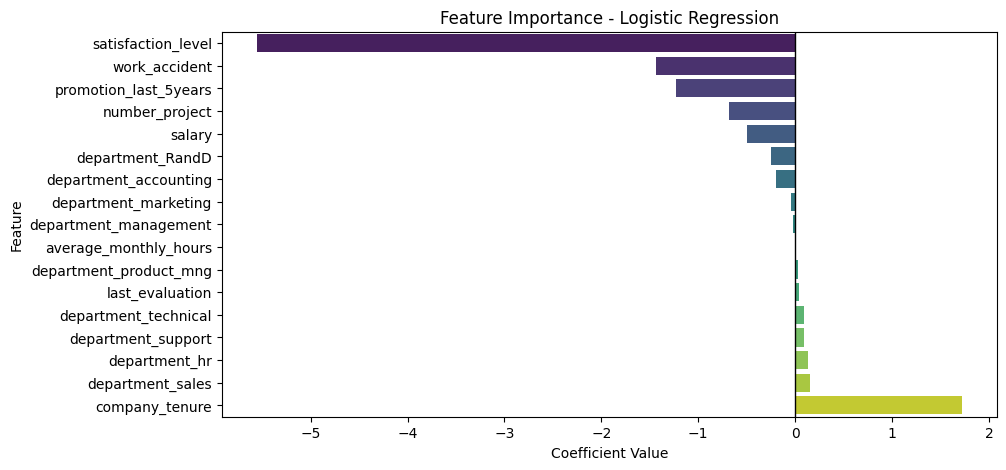

In [22]:
# Sort features by absolute coefficient values
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=True)

# 📌 Feature Importance Plot
plt.figure(figsize=(10, 5))
sns.barplot(y="Feature", x="Coefficient", data=coef_df_sorted, hue="Feature", palette="viridis", legend=False,)
plt.axvline(0, color="black", linewidth=1)  # Reference line at zero
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

#### 🔍 ***Key Insights Summary:***

Satisfaction level is the strongest predictor of attrition, with lower satisfaction dramatically increasing the likelihood of employees leaving. Work accidents, lack of promotions, and high workload also contribute to higher attrition risk. However, the model's interpretation of tenure as a risk factor is misleading due to outlier removal—real-world data shows that long-tenured employees rarely leave, indicating tenure is a stability factor rather than an attrition driver.

<br>

## **6️⃣ Build and Train Tree-based Models: Round 1**

#### **🔧 Variable Selection & Train/Validate/Test Sets**

In [23]:
# Define features and target variable
tree_models = df_enc.copy()
X = tree_models.drop(columns=['left'])  # features
y = tree_models['left']  # target

In [24]:
# Split the data into training (80%) and testing (20%) sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Split the training set further into training (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42, stratify=y_tr)

In [26]:
# Confirm split sizes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7194, 17) (7194,)
Validation set shape: (2398, 17) (2398,)
Test set shape: (2399, 17) (2399,)


<br>

#### **🔧 Instantiate Decision Tree 1**

In [27]:
# 🔧 Initialize Decision Tree Classifier
dt1 = DecisionTreeClassifier(random_state=42)

# Define Hyperparameter Grid
dt1_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define Scoring Metric (Maximizing Recall)
scoring = {'recall': make_scorer(recall_score, average='binary')}

# Run GridSearchCV
dt1_cv = GridSearchCV(dt1, dt1_params, scoring=scoring, cv=5, refit='recall')

In [28]:
%%time
# Fit the model
dt1_cv.fit(X_train, y_train)

CPU times: total: 3.84 s
Wall time: 3.92 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [29]:
# Make predictions for Decision Tree
y_pred_dt1 = dt1_cv.best_estimator_.predict(X_val)
y_pred_proba_dt1 = dt1_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [30]:
# Get evaluation metrics
dt1_scores = get_model_scores("Decision Tree 1", y_val, y_pred_dt1, y_pred_proba_dt1)

In [31]:
# Best Model & Results
print("🔹 Best Parameters for Decision Tree 1:")
dt1_cv.best_params_

🔹 Best Parameters for Decision Tree 1:


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

<br>

#### **🔧 Instantiate Random Forest Model 1**

In [32]:
# 🔧 Initialize Random Forest Classifier
rf1 = RandomForestClassifier(random_state=42)

# Define Hyperparameter Grid
rf1_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Run GridSearchCV
rf1_cv = GridSearchCV(rf1, rf1_params, scoring=scoring, cv=5, refit='recall')

In [118]:
%%time
# Fit the model
rf1_cv.fit(X_train, y_train)

CPU times: total: 2min 48s
Wall time: 2min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [34]:
# Make predictions for Random Forest
y_pred_rf1 = rf1_cv.best_estimator_.predict(X_val)
y_pred_proba_rf1 = rf1_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [35]:
# Get evaluation metrics
rf1_scores = get_model_scores("Random Forest 1", y_val, y_pred_rf1, y_pred_proba_rf1)

In [36]:
# Best Model & Results
print("🔹 Best Parameters for Random Forest 1:")
rf1_cv.best_params_

🔹 Best Parameters for Random Forest 1:


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

<br>

#### **🔧 Instantiate XGBoost Model 1**

In [37]:
# 🔧 Initialize XGBoost Classifier
xgb1 = XGBClassifier(eval_metric='logloss', random_state=42)

# Define Hyperparameter Grid
xgb1_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Run GridSearchCV
xgb1_cv = GridSearchCV(xgb1, xgb1_params, scoring=scoring, cv=5, refit='recall')

In [38]:
%%time
# Fit the model
xgb1_cv.fit(X_train, y_train)

CPU times: total: 8min 13s
Wall time: 2min 21s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1.0]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [39]:
# Make predictions for XGBoost
y_pred_xgb1 = xgb1_cv.best_estimator_.predict(X_val)
y_pred_proba_xgb1 = xgb1_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [40]:
# Get evaluation metrics
xgb1_scores = get_model_scores("XGBoost 1", y_val, y_pred_xgb1, y_pred_proba_xgb1)

In [41]:
# Best Model & Results
print("🔹 Best Parameters for XGBoost 1:")
xgb1_cv.best_params_

🔹 Best Parameters for XGBoost 1:


{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1.0}

<br>

**Quickly** compare models before exploring further feature engineering ideas.

In [42]:
# Store results in a DataFrame for easy comparison
comparison_df1 = pd.DataFrame([dt1_scores, rf1_scores, xgb1_scores])

# Display results
comparison_df1

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Decision Tree 1,0.957048,0.828508,0.934673,0.878394,0.968470
1,Random Forest 1,0.984570,0.983914,0.922111,0.952010,0.984153
2,XGBoost 1,0.983319,0.971053,0.927136,0.948586,0.991512


#### 🔍 ***Key Insights:*** 

The comparison of tree-based models highlights that XGBoost is the best-performing model, with the highest AUC-ROC (0.9915), indicating its superior ability to distinguish between stayers and leavers. While Random Forest also performs well with high precision and recall, Decision Tree underperforms relative to the ensemble models, suggesting that combining multiple trees significantly improves predictive accuracy and robustness.

<br>

**Assess** feature importance of each model.

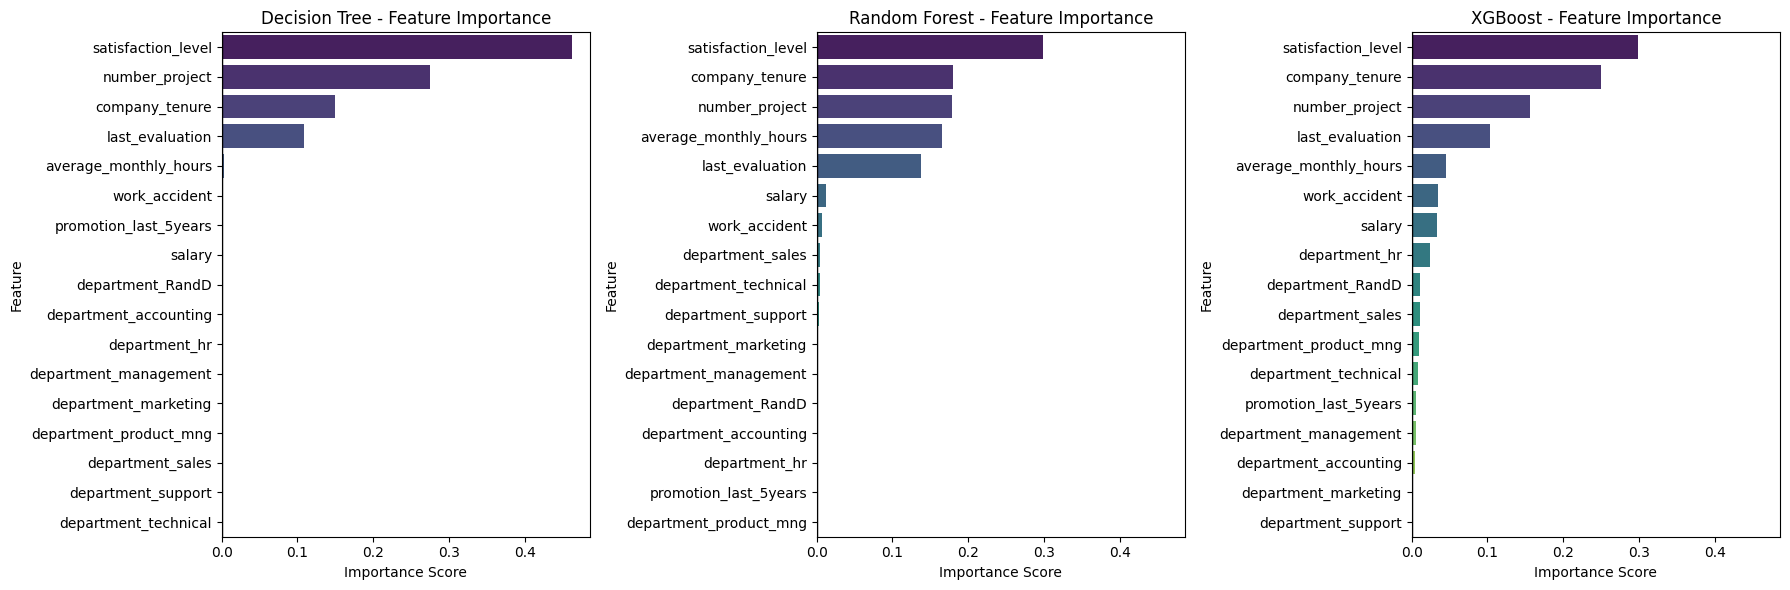

In [43]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Define models and titles
models = [dt1_cv.best_estimator_, rf1_cv.best_estimator_, xgb1_cv.best_estimator_]
titles = ["Decision Tree", "Random Forest", "XGBoost"]

# Loop through each model to plot feature importance
for i, (model, title) in enumerate(zip(models, titles)):
    # Extract feature importance
    feat_importance = model.feature_importances_
    feat_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feat_importance})
    feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

    # Plot feature importance
    sns.barplot(y="Feature", x="Importance", data=feat_importance_df, hue="Feature", palette="viridis", legend=False, ax=axes[i])
    axes[i].axvline(0, color="black", linewidth=1)  # Reference line at zero
    axes[i].set_title(f"{title} - Feature Importance")
    axes[i].set_xlabel("Importance Score")
    axes[i].set_ylabel("Feature")

plt.tight_layout()
plt.show()

#### 🔍 ***Key Insights:*** 

Across all three models, satisfaction level emerges as the most significant factor in predicting employee attrition, confirming its direct influence on retention. Company tenure and number of projects also play a key role, suggesting that longer employment and workload dynamics contribute to attrition risk. While Decision Tree, Random Forest, and XGBoost share similar key predictors, the ensemble models (Random Forest and XGBoost) place greater emphasis on tenure, indicating their ability to capture deeper patterns in the data.

<br>

## **7️⃣ Assess Models and Features**

#### **🔧 Feature Engineering**

At this stage, I am cautious about the high evaluation scores obtained from the models. One possibility is data leakage, which occurs when a model is trained on data that it wouldn’t realistically have access to when deployed. This can lead to overly optimistic performance metrics that don’t hold up in real-world scenarios. To ensure the model remains robust and generalizable, it is crucial to carefully examine whether certain features may be inadvertently introducing information that inflates predictive accuracy.

One key candidate for removal is `'satisfaction_level'`. In a real-world setting, companies are unlikely to have this information for all employees, especially at the time decisions about retention or intervention need to be made. Additionally, questions arise about how and when this data was collected—was it recorded before an employee left, measured after their departure, or gathered in response to their exit? If satisfaction scores were influenced by the resignation process itself, they could introduce bias rather than serve as a true predictor. Furthermore, some employees may not disclose dissatisfaction truthfully due to fear of repercussions, making this metric unreliable. Relying on `'satisfaction_level'` could mean the model is using privileged or retrospective information that wouldn’t be available in a real-world setting, reducing its practical value. Removing this feature ensures the model remains realistic, actionable, and aligned with the data HR teams would actually have when making retention decisions.

Similarly, `'average_monthly_hours'` might be problematic. If employees who have already decided to leave—or those identified as potential terminations—are working fewer hours, this feature could be capturing post-decision behavior rather than a genuine predictor of attrition. Instead of using raw hours worked, a more stable approach could be to introduce a new ‘overworked’ feature, a binary variable that classifies employees based on whether they are working significantly higher-than-average hours. This could help maintain a predictive signal without introducing potential leakage.

Additionally, `'company_tenure'` has consistently emerged as a strong predictor, but our exploratory data analysis (EDA) uncovered a more nuanced attrition pattern. Three distinct tenure categories became apparent (see table below):

* 0–3 years: Higher attrition among underperforming employees, likely due to onboarding challenges or early dissatisfaction.
* 4–6 years: Peak attrition driven by high performers experiencing dissatisfaction and overwork, indicating a critical retention risk.
* 7+ years: No attrition, suggesting these employees are well-integrated and here to stay.

Given these insights, we will replace company_tenure with three categorical variables to better capture these tenure-based retention trends. This approach enhances model interpretability and aligns with real-world HR decision-making.

* `'short_tenured'` (for employees with tenure <=3 years)  
* `'mid_tenured'` (for employees with tenure >=4 & <=6 years)  
* `'long_tenured'` (for employees with tenure >=7 years)  

This transformation could enhance the model's ability to differentiate between high-risk and low-risk groups while reducing noise.

In [117]:
# Aggregate data for table: Calculate mean last evaluation, satisfaction_level, 'average_monthly_hours', and 
# 'number_project' per tenure year by attrition status
eval_sat = df_enc.groupby(["company_tenure", "left"])[["last_evaluation", "satisfaction_level", 
                                                       "average_monthly_hours", "number_project"]].mean().reset_index()
eval_sat

,company_tenure,left,last_evaluation,satisfaction_level,average_monthly_hours,number_project
0,2,0,0.717603,0.700907,199.742966,3.681834
1,2,1,0.753548,0.537419,209.870968,3.967742
2,3,0,0.717157,0.697020,199.219416,3.729379
3,3,1,0.522243,0.411796,147.475973,2.116705
4,4,0,0.720444,0.637901,198.607285,3.912583
5,4,1,0.857798,0.144505,268.856566,5.981818
6,5,0,0.702362,0.479121,193.331034,4.215517
7,5,1,0.899564,0.708402,248.153527,4.763485
8,6,0,0.693025,0.513880,200.050808,4.057737
9,6,1,0.908899,0.798440,241.807339,4.605505


<br>

**I'll** begin by dropping the `'satisfaction_level'` column.

In [82]:
# Drop 'satisfaction_level' and save as a new variable
df_enc2 = df_enc.drop('satisfaction_level', axis=1)

# Display new dataframe
df_enc2.head(3)

,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0


<br>

**Create** `'overworked'` column.

In [83]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df_enc2['overworked'] = df_enc2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_enc2['overworked'].max())
print('Min hours:', df_enc2['overworked'].min())
print('Avg. hours:', df_enc2['overworked'].mean())
print('Median hours:', df_enc2['overworked'].median())

Max hours: 310
Min hours: 96
Avg. hours: 200.4735218080227
Median hours: 200.0


The average and median number of monthly hours worked is 200. In many countries, a full-time work year typically consists of 48 to 50 weeks, accounting for 2 to 4 weeks of vacation or paid time off (PTO). Using a conservative estimate of 2 weeks PTO, the average Salifort employee works 200 hours per month, 50 weeks per year, 48 hours per week, and 9.6 hours per day across a 5-day workweek.

I will define the `'overworked`' column as employees working more than 200 hours per month, aligning with insights from the EDA. This threshold reflects Salifort Motors' actual work patterns rather than an industry-standard 40-hour workweek.

<br>

In [84]:
# Define `overworked` as working > 200 hrs/week
df_enc2['overworked'] = (df_enc2['overworked'] > 200).astype(int)

# Display first few rows of new column
df_enc2['overworked'].head(3)

0    0
1    1
2    1
Name: overworked, dtype: int64

In [85]:
# Drop 'average_monthly_hours'
df_enc2 = df_enc2.drop('average_monthly_hours', axis=1)

# Display new dataframe
df_enc2.head(3)

,last_evaluation,number_project,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1


<br>

**Create** `'short_tenured'`, `'mid_tenured'`, and `'long_tenured'` columns.

In [86]:
# Create 'short_tenured' column (0-3 years)
df_enc2['short_tenured'] = (df_enc2['company_tenure'] <= 3).astype(int)

# Create 'mid_tenured' column (4-6 years)
df_enc2['mid_tenured'] = ((df_enc2['company_tenure'] >= 4) & (df_enc2['company_tenure'] <= 6)).astype(int)

# Create 'long_tenured' column (7+ years)
df_enc2['long_tenured'] = (df_enc2['company_tenure'] >= 7).astype(int)

# Drop 'company_tenure' column
df_enc2 = df_enc2.drop('company_tenure', axis=1)

# Display first few rows of new columns
df_enc2[['short_tenured', 'mid_tenured', 'long_tenured']].head(3)

,short_tenured,mid_tenured,long_tenured
0,1,0,0
1,0,1,0
2,0,1,0


In [87]:
df_enc2.head()

,last_evaluation,number_project,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked,short_tenured,mid_tenured,long_tenured
0,0.53,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.86,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0.88,7,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
3,0.87,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0.52,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


<br>

## **8️⃣ Build and Train Tree-based Models: Round 2**

#### **🔧 Variable Selection & Train/Validate/Test Sets**

In [88]:
# Define features and target variable
tree_models2 = df_enc2.copy()
X = tree_models2.drop(columns=['left']) # features
y = tree_models2['left'] # target

In [89]:
# Split the data into training (80%) and testing (20%) sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
# Split the trainig set fruther into training (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42, stratify=y_tr)

In [91]:
# Confrim split sizes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7194, 18) (7194,)
Validation set shape: (2398, 18) (2398,)
Test set shape: (2399, 18) (2399,)


<br>

#### **🔧 Instantiate Decision Tree Model 2**

In [92]:
# 🔧 Initialize Decision Tree Classifier
dt2 = DecisionTreeClassifier(random_state=42)

# Define Hyperparameter Grid
dt2_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define Scoring Metric (Maximizing Recall)
scoring = {'recall': make_scorer(recall_score, average='binary')}

# Run GridSearchCV
dt2_cv = GridSearchCV(dt2, dt2_params, scoring=scoring, cv=5, refit='recall')

In [93]:
%%time
# Fit the model
dt2_cv.fit(X_train, y_train)

CPU times: total: 2.64 s
Wall time: 2.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [94]:
# Make predictions for Decision Tree 2
y_pred_dt2 = dt2_cv.best_estimator_.predict(X_val)
y_pred_proba_dt2 = dt2_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [95]:
# Get evaluation metrics
dt2_scores = get_model_scores("Decision Tree 2", y_val, y_pred_dt2, y_pred_proba_dt2)

In [96]:
# Best Model & Results
print("🔹 Best Parameters for Decision Tree 2:")
dt2_cv.best_params_

🔹 Best Parameters for Decision Tree 2:


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

<br>

#### **🔧 Instantiate Random Forest Model 2**

In [97]:
# 🔧 Initialize Random Forest Classifier
rf2 = RandomForestClassifier(random_state=42)

# Define Hyperparameter Grid
rf2_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Run GridSearchCV
rf2_cv = GridSearchCV(rf2, rf2_params, scoring=scoring, cv=5, refit='recall')

In [98]:
%%time
# Fit the model
rf2_cv.fit(X_train, y_train)

CPU times: total: 2min 49s
Wall time: 2min 54s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [99]:
# Make predictions for Random Forest 2
y_pred_rf2 = rf2_cv.best_estimator_.predict(X_val)
y_pred_proba_rf2 = rf2_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [100]:
# Get evaluation metrics
rf2_scores = get_model_scores("Random Forest 2", y_val, y_pred_rf2, y_pred_proba_rf2)

In [101]:
# Best Model & Results
print("🔹 Best Parameters for Random Forest 2:")
rf2_cv.best_params_

🔹 Best Parameters for Random Forest 2:


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

<br>

#### **🔧 Instantiate XGBoost Model 2**

In [102]:
# 🔧 Initialize XGBoost Classifier
xgb2 = XGBClassifier(eval_metric='logloss', random_state=42)

# Define Hyperparameter Grid
xgb2_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Run GridSearchCV
xgb2_cv = GridSearchCV(xgb2, xgb2_params, scoring=scoring, cv=5, refit='recall')

In [103]:
%%time
# Fit the model
xgb2_cv.fit(X_train, y_train)

CPU times: total: 8min 34s
Wall time: 2min 27s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1.0]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [104]:
# Make predictions for XGBoost 2
y_pred_xgb2 = xgb2_cv.best_estimator_.predict(X_val)
y_pred_proba_xgb2 = xgb2_cv.best_estimator_.predict_proba(X_val)[:, 1]

In [105]:
# Get evaluation metrics
xgb2_scores = get_model_scores("XGBoost 2", y_val, y_pred_xgb2, y_pred_proba_xgb2)

In [106]:
# Best Model & Results
print("🔹 Best Parameters for XGBoost 2:")
xgb2_cv.best_params_

🔹 Best Parameters for XGBoost 2:


{'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

<br>

# **Model Evaluation**  

## **9️⃣ Performance Metrics & Comparison**

**Quick** model comparison before full breakdown.

In [107]:
# Store results in a DataFrame for easy comparison
comparison_df2 = pd.DataFrame([dt1_scores, rf1_scores, xgb1_scores, dt2_scores, rf2_scores, xgb2_scores])

# Display results
comparison_df2

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Decision Tree 1,0.957048,0.828508,0.934673,0.878394,0.968470
1,Random Forest 1,0.984570,0.983914,0.922111,0.952010,0.984153
2,XGBoost 1,0.983319,0.971053,0.927136,0.948586,0.991512
3,Decision Tree 2,0.894912,0.622483,0.932161,0.746479,0.939473
4,Random Forest 2,0.953294,0.857500,0.861809,0.859649,0.967142
5,XGBoost 2,0.958716,0.856802,0.902010,0.878825,0.971691


**Full** breakdown classification report for the latest models.

In [108]:
# Evaluate Models
print("♦ Decision Tree Model 2")
print(classification_report(y_val, y_pred_dt2))
print(f"AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_dt2):.4f}")

print("\n" + "="*60 + "\n")

print("♦ Random Forest Model 2")
print(classification_report(y_val, y_pred_rf2))
print(f"AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_rf2):.4f}")

print("\n" + "="*60 + "\n")

print("♦ XGBoost Model 2")
print(classification_report(y_val, y_pred_xgb2))
print(f"AUC-ROC Score: {roc_auc_score(y_val, y_pred_proba_xgb2):.4f}")

♦ Decision Tree Model 2
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2000
           1       0.62      0.93      0.75       398

    accuracy                           0.89      2398
   macro avg       0.80      0.91      0.84      2398
weighted avg       0.92      0.89      0.90      2398

AUC-ROC Score: 0.9395


♦ Random Forest Model 2
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.86      0.86      0.86       398

    accuracy                           0.95      2398
   macro avg       0.91      0.92      0.92      2398
weighted avg       0.95      0.95      0.95      2398

AUC-ROC Score: 0.9671


♦ XGBoost Model 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2000
           1       0.86      0.90      0.88       398

    accuracy                           0.96      2398
   macro avg  

<br>

## **🔟 Confusion Matrix & ROC Curve Analysis**

In [109]:
# Generate confusion matrices
cm_dt2 = confusion_matrix(y_val, y_pred_dt2)
cm_rf2 = confusion_matrix(y_val, y_pred_rf2)
cm_xgb2 = confusion_matrix(y_val, y_pred_xgb2)

# Compute ROC Curves
fpr_dt2, tpr_dt2, _ = roc_curve(y_val, y_pred_proba_dt2)
fpr_rf2, tpr_rf2, _ = roc_curve(y_val, y_pred_proba_rf2)
fpr_xgb2, tpr_xgb2, _ = roc_curve(y_val, y_pred_proba_xgb2)

# AUC Scores
auc_dt2 = auc(fpr_dt2, tpr_dt2)
auc_rf2 = auc(fpr_rf2, tpr_rf2)
auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

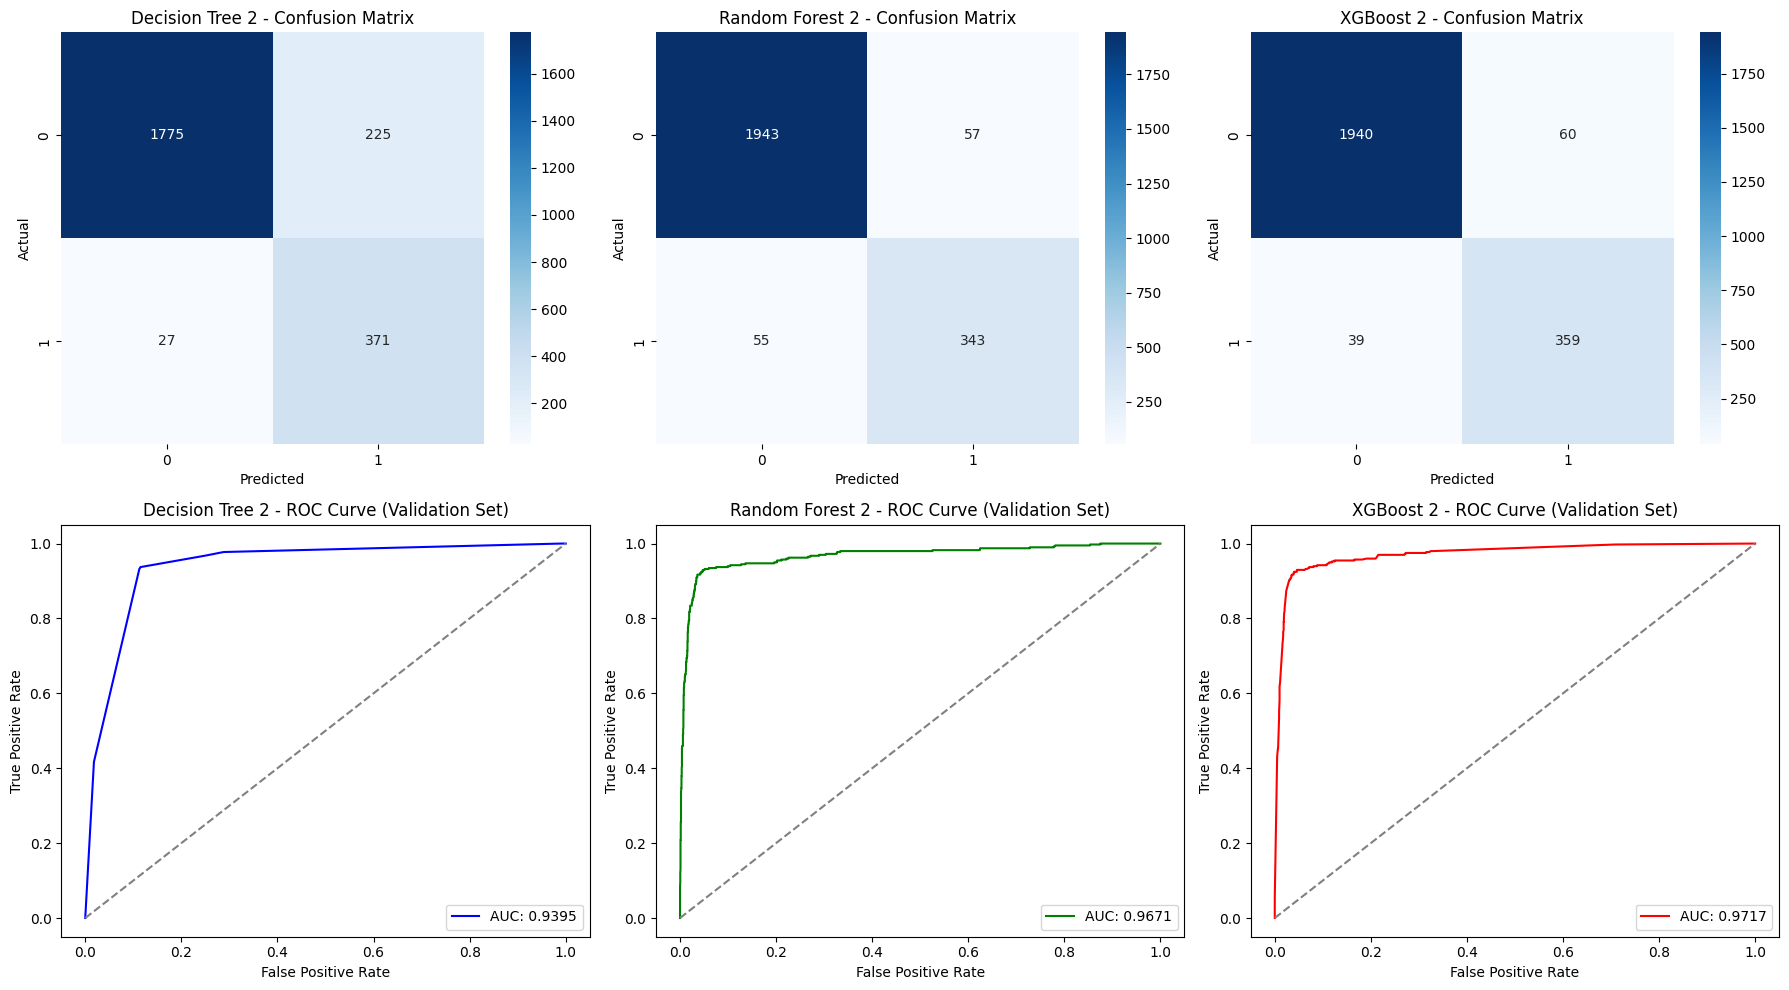

In [110]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Confusion Matrix Plots
sns.heatmap(cm_dt2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Decision Tree 2 - Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_rf2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Random Forest 2 - Confusion Matrix")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_xgb2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title("XGBoost 2 - Confusion Matrix")
axes[0, 2].set_xlabel("Predicted")
axes[0, 2].set_ylabel("Actual")

# ROC Curves
axes[1, 0].plot(fpr_dt2, tpr_dt2, label=f'AUC: {auc_dt2:.4f}', color='blue')
axes[1, 0].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1, 0].set_title("Decision Tree 2 - ROC Curve (Validation Set)")
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].legend(loc='lower right')

axes[1, 1].plot(fpr_rf2, tpr_rf2, label=f'AUC: {auc_rf2:.4f}', color='green')
axes[1, 1].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1, 1].set_title("Random Forest 2 - ROC Curve (Validation Set)")
axes[1, 1].set_xlabel("False Positive Rate")
axes[1, 1].set_ylabel("True Positive Rate")
axes[1, 1].legend(loc='lower right')

axes[1, 2].plot(fpr_xgb2, tpr_xgb2, label=f'AUC: {auc_xgb2:.4f}', color='red')
axes[1, 2].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1, 2].set_title("XGBoost 2 - ROC Curve (Validation Set)")
axes[1, 2].set_xlabel("False Positive Rate")
axes[1, 2].set_ylabel("True Positive Rate")
axes[1, 2].legend(loc='lower right')

plt.tight_layout()
plt.show()

#### 🔍 ***Key Insights:***

While logistic regression was initially considered, its AUC-ROC score (~0.88) remained significantly lower than the tree-based models, which achieved AUC-ROC scores above 0.93. Given this performance gap, the second round of tree-based models was prioritized for evaluation and final selection.

**Overall Model Performance:**  
* After adding new features, all three models—Decision Tree, Random Forest, and XGBoost—continued to perform well, with accuracy ranging from 89% to 96%. The AUC-ROC scores indicate strong classification ability, with XGBoost (0.9717) leading, followed by Random Forest (0.9671) and Decision Tree (0.9395).

#### 🏆 ***Champion Model: XGBoost***

After evaluating the second round of tree-based models, XGBoost again emerges as the champion model for the following reasons:

* **Highest AUC-ROC Score (0.9717)** – XGBoost outperforms both Random Forest (0.9671) and Decision Tree (0.9395), achieving the strongest separation between employees who stay and those who leave.

* **Strong Overall Performance** - XGBoost maintains high accuracy (96%), balancing precision, recall, and F1-score while ensuring strong predictive capability across both classes.

* **Better Detection of Attrition** - With a recall of 0.90 for employees who left, XGBoost effectively identifies at-risk employees while maintaining a competitive precision-recall balance.

#### 💡 ***Summary:***

XGBoost emerges as the top-performing model, outperforming Random Forest and Decision Tree in AUC-ROC and overall accuracy. While all models performed well, XGBoost offers the best trade-off between precision, recall, and model reliability, making it the recommended model for deployment in attrition prediction.

<br>

## **1️⃣1️⃣ Use Champion Model on Test Data**

In [111]:
# Define the champion model
champion_model = xgb2_cv.best_estimator_

# Make predictions on the test set
y_pred_test = champion_model.predict(X_test)
y_pred_proba_test = champion_model.predict_proba(X_test)[:, 1]

# Generate Classification Report
print("🏆 Champion Model: XGBoost 2 (Test Set Performance)")
print(classification_report(y_test, y_pred_test))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_test):.4f}")

🏆 Champion Model: XGBoost 2 (Test Set Performance)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.91      0.88       398

    accuracy                           0.96      2399
   macro avg       0.91      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399

AUC-ROC Score: 0.9670


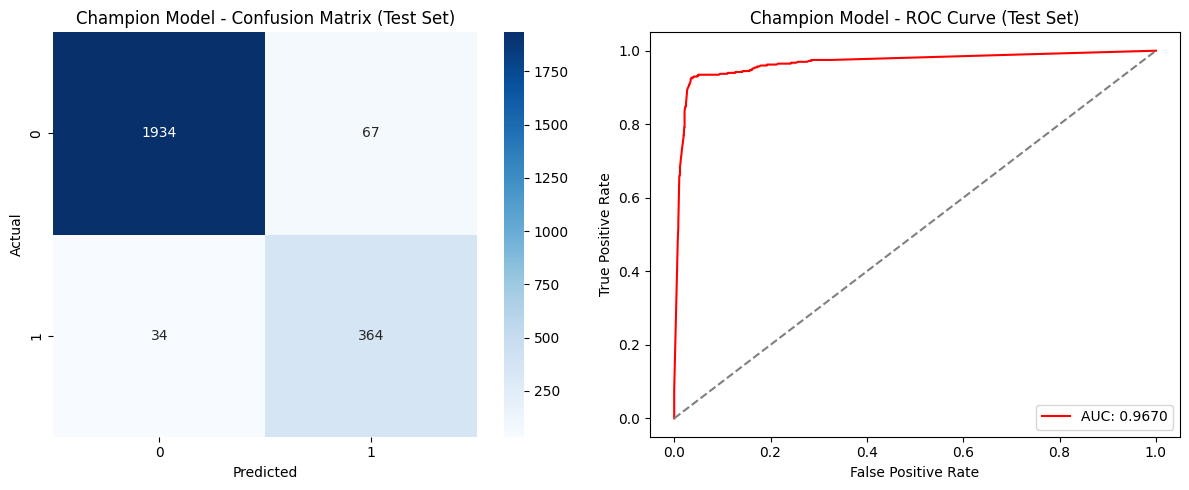

In [112]:
# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Compute ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Create subplots for Confusion Matrix & ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Champion Model - Confusion Matrix (Test Set)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ROC Curve
axes[1].plot(fpr_test, tpr_test, label=f'AUC: {auc_test:.4f}', color='red')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1].set_title("Champion Model - ROC Curve (Test Set)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

#### 🔍 ***Key Insights:***

* The XGBoost model achieved a strong overall accuracy of 96% on the test set, demonstrating its reliability in classifying both employees who stay and those who leave.
* The AUC-ROC score of 0.9670 indicates that the model maintains a high ability to distinguish between the two classes, though slightly lower than its validation performance.
* Precision and recall balance is well maintained, with 84% precision and 91% recall for employees who left, ensuring effective identification of at-risk employees while minimizing false positives.
* The confusion matrix shows a small proportion of misclassifications, with 67 false positives and 34 false negatives, suggesting the model performs well but has room for improvement in correctly identifying departing employees.

#### 💡 ***Summary:***
The XGBoost model continues to be a robust choice for predicting employee attrition, maintaining strong accuracy and classification performance on unseen data. While its AUC-ROC score slightly declined from validation to test set, it remains a highly effective tool for identifying employees at risk of leaving.

<br>

## **1️⃣2️⃣ Visualizing Champion Model Feature Importance**

In [113]:
# Extract feature importances from the Random Forest champion model
importances = xgb2_cv.best_estimator_.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feat_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by absolute importance
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Display the results
display(feat_importance_df)

,Feature,Importance
16,mid_tenured,0.556049
1,number_project,0.157423
14,overworked,0.145411
0,last_evaluation,0.072834
2,work_accident,0.024619
15,short_tenured,0.018771
4,salary,0.008779
10,department_product_mng,0.006447
7,department_hr,0.004409
11,department_sales,0.002340


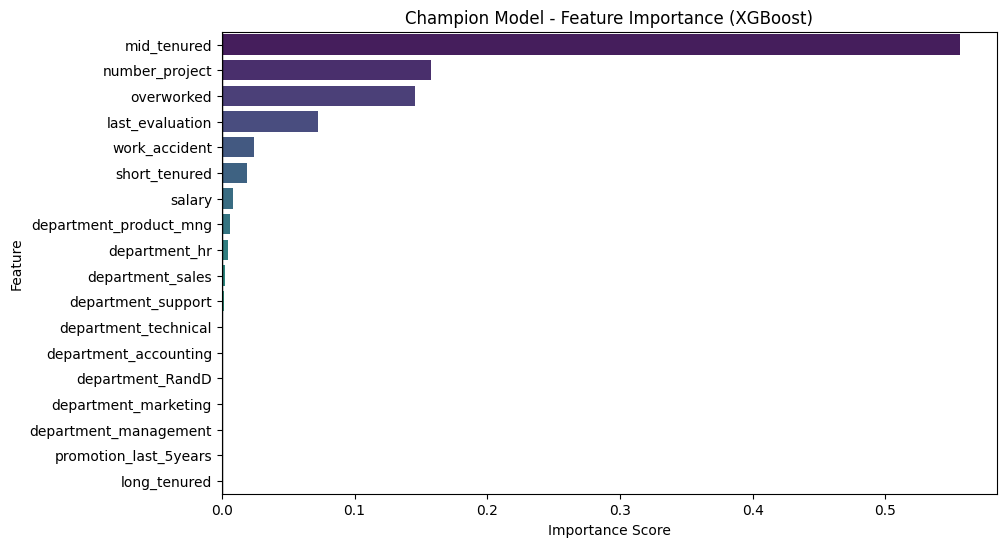

In [114]:
# Extract feature importance from the champion model (XGBoost)
feature_importance = champion_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(y="Feature", x="Importance", data=feat_importance_df, hue="Feature", palette="viridis", legend=False)
plt.axvline(0, color="black", linewidth=1)  # Reference line at zero
plt.title("Champion Model - Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#### 🔍 ***Key Insights: XGBoost Feature Importance***  

* **Top Predictors of Attrition:** - The most influential features in the model are mid_tenured, number of projects, and overworked status, highlighting the impact of workload and tenure duration as key drivers of employee attrition. 

* **Tenure Split & Real-World Alignment:** - The refined dataset now distinguishes mid_tenured employees as the highest risk group, while long_tenured employees show zero importance, confirming that longer tenure does not contribute to attrition risk.

* **Workload & Performance Factors:** - Employees with high project counts and overworked status are at greater risk, reinforcing earlier EDA findings that workload imbalance significantly contributes to attrition.

* **Evaluation & Job Experience Influence:** – Last evaluation score remains an important factor, indicating that performance assessments may play a role in attrition decisions.

#### 💡 ***Summary:***

With feature engineering adjustments to better reflect real-world workforce dynamics—including introducing `'overworked'`, `'short_tenured'`, `'mid_tenured'`, and `'long_tenured'` categories and removing `'satisfaction_level'`—the model now clearly identifies mid-tenure employees, workload intensity, and performance evaluation as the key drivers of attrition. These findings align with earlier EDA insights, confirming that employees in the mid-tenure phase, those managing excessive workloads, and those undergoing high-stakes evaluations are at the highest risk of leaving, while long-tenured employees show no significant attrition risk.

<br>

# **Final Thoughts**

## **1️⃣3️⃣ Final Conclusion: Employee Attrition Analysis & Model Selection**

The initial analysis identified satisfaction level, workload, and performance evaluation as the strongest predictors of employee attrition at Salifort Motors. However, through feature engineering and model refinement, it became evident that satisfaction level was not a reliable predictor in a real-world setting, as companies would not always have access to this data at the time of decision-making. Instead, mid-tenured status, project count, and overworked status emerged as the most actionable predictors, providing a more realistic and interpretable understanding of attrition risk. Additionally, the analysis confirmed that long-tenured employees are at minimal risk, reinforcing the need to focus retention efforts on mid-tenure employees who face the highest likelihood of leaving.

After extensive model comparison, XGBoost emerged as the best-performing model, achieving the highest AUC-ROC score (0.9670) while maintaining a strong balance between precision and recall. While its AUC-ROC score slightly declined from validation to test set, the refined model successfully identifies employees at risk of leaving based on real-world workforce dynamics, such as mid-tenure vulnerability, workload strain, and performance evaluation frequency, without relying on inaccessible or misleading predictors. These insights provide a data-driven foundation for HR to implement targeted retention strategies, such as optimizing workload distribution, adjusting project assignments, and refining evaluation processes, to proactively reduce attrition and enhance workforce stability.